##  A simple Kneighbour Regression to predict happiness index according to GDP of a country.

#### It has its own flaws as it is not perfectly trained with full data, just an example

In [117]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

In [118]:
# Loading the data
oecd_bli = pd.read_csv("oecd_bli_2015.csv",thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter="\t",na_values="n/a",encoding='latin1')

In [119]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [120]:
# Preparing the data
country_stats = prepare_country_stats(oecd_bli,gdp_per_capita)


In [121]:
X=np.c_[country_stats["GDP per capita"]]
Y=np.c_[country_stats["Life satisfaction"]]

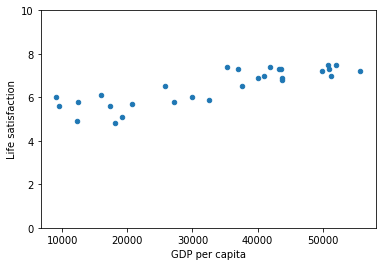

In [122]:
country_stats.plot(kind='scatter',x='GDP per capita',y='Life satisfaction')
plt.yticks(np.arange(0,11,step=2))
plt.show()

In [123]:
# training the linear model
model = KNeighborsRegressor(n_neighbors=3)

In [124]:
model.fit(X,Y)

KNeighborsRegressor(n_neighbors=3)

In [125]:
y_pred = model.predict(X)
X_new=[[22587]]
print(model.predict(X_new))

[[5.76666667]]


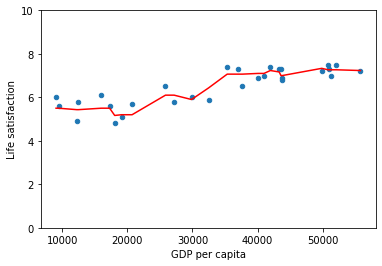

In [126]:
country_stats.plot(kind='scatter',x='GDP per capita',y='Life satisfaction')
plt.plot(X,y_pred,color="red")
plt.yticks(np.arange(0,11,step=2))
plt.show()